In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
from sklearn.datasets import fetch_california_housing

In [39]:
# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [40]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [52]:
# droping latitude and Longtitude columns and NaN values
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [37]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


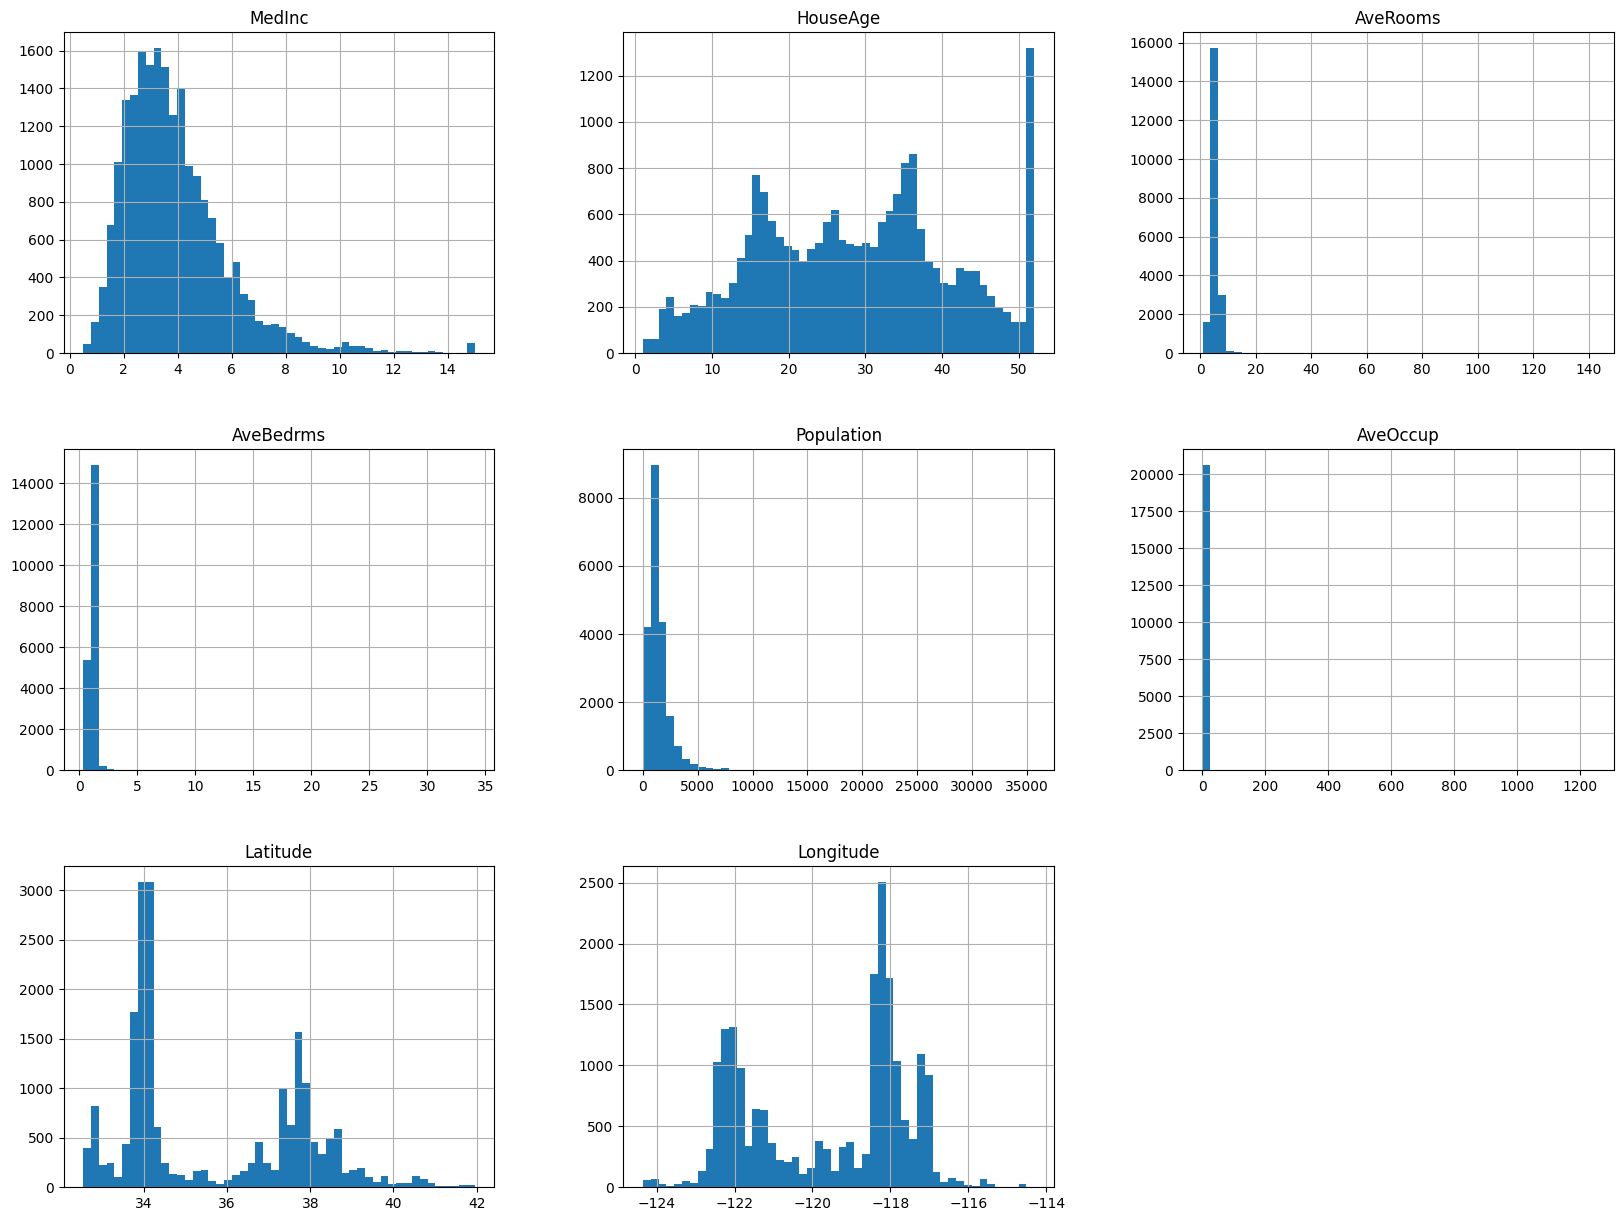

In [45]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [71]:
X = pd.DataFrame(np.c_[df['MedInc'],df['HouseAge'],df['AveRooms'],df['AveBedrms'],df['Population']],columns=['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population'])
Y = data.target

In [73]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population
0,8.3252,41.0,6.984127,1.023810,322.0
1,8.3014,21.0,6.238137,0.971880,2401.0
2,7.2574,52.0,8.288136,1.073446,496.0
3,5.6431,52.0,5.817352,1.073059,558.0
4,3.8462,52.0,6.281853,1.081081,565.0
...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0
20636,2.5568,18.0,6.114035,1.315789,356.0
20637,1.7000,17.0,5.205543,1.120092,1007.0
20638,1.8672,18.0,5.329513,1.171920,741.0


In [74]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 5)
(4128, 5)
(16512,)
(4128,)


In [80]:
def poly(degree):
    
    poly_features = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)
    
    regression=LinearRegression()
    regression.fit(X_train_poly,Y_train)
    
    Y_train_predict_poly=regression.predict(X_train_poly)
    Y_test_predict_poly=regression.predict(X_test_poly)
    
    rmse_train=(np.sqrt(mean_squared_error(Y_train,Y_train_predict_poly)))
    rmse_test=(np.sqrt(mean_squared_error(Y_test,Y_test_predict_poly)))
    
    r2_train=r2_score(Y_train,Y_train_predict_poly)
    r2_test=r2_score(Y_test,Y_test_predict_poly)
    
    
    print("Train Mean Squared Error is :", rmse_train)
    print("Test Mean Squared  Error is :", rmse_test)
    print("Train R2 Score is  :", r2_train)
    print("Test R2 Score is  :", r2_test)
    

In [82]:
poly (2)

Train Mean Squared Error is : 0.7452141518905843
Test Mean Squared  Error is : 0.8377268967085265
Train R2 Score is  : 0.5845652425508847
Test R2 Score is  : 0.4644524227764524


In [83]:
poly (3)

Train Mean Squared Error is : 0.716190405118536
Test Mean Squared  Error is : 1.6788304118153259
Train R2 Score is  : 0.6162948409390661
Test R2 Score is  : -1.1508335171967068


In [84]:
X1 = pd.DataFrame(np.c_[df['MedInc'],df['Population']],columns=['MedInc','Population'])
Y1 = data.target

In [85]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [87]:
def poly_new(degree):
    
    poly_features = PolynomialFeatures(degree=degree)
    
    X1_train_poly = poly_features.fit_transform(X1_train)
    X1_test_poly = poly_features.fit_transform(X1_test)
    
    regression=LinearRegression()
    regression.fit(X1_train_poly,Y1_train)
    
    Y1_train_predict_poly=regression.predict(X1_train_poly)
    Y1_test_predict_poly=regression.predict(X1_test_poly)
    
    rmse_train=(np.sqrt(mean_squared_error(Y1_train,Y1_train_predict_poly)))
    rmse_test=(np.sqrt(mean_squared_error(Y1_test,Y1_test_predict_poly)))
    
    r2_train=r2_score(Y1_train,Y1_train_predict_poly)
    r2_test=r2_score(Y1_test,Y1_test_predict_poly)
    
    
    print("Train Mean Squared Error is :", rmse_train)
    print("Test Mean Squared  Error is :", rmse_test)
    print("Train R2 Score is  :", r2_train)
    print("Test R2 Score is  :", r2_test)
    

In [88]:
poly_new (2)

Train Mean Squared Error is : 0.8313683160248538
Test Mean Squared  Error is : 0.8378954365686522
Train R2 Score is  : 0.4829559078728636
Test R2 Score is  : 0.4642369105521291


In [89]:
poly_new (3)

Train Mean Squared Error is : 0.8224291607049206
Test Mean Squared  Error is : 0.8336675103265561
Train R2 Score is  : 0.49401499933756643
Test R2 Score is  : 0.46963007021895375
